<a href="https://colab.research.google.com/github/Dundee1122/Data-Science-Analytics-Python-Coded/blob/main/Dundee_FPS_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIT Applied Data Science
Project Foundations for Data Science: FoodHub Data Analysis

**Grade: 58/60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to food order delivery. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Datasets/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

* As mentioned in the Data Dictionary, each row has nine columns that capture categorical data including restaurant names and cuisine as well as whether the deliveries were made on a weekend or weekday.
* Numerical data is also provided, offering order costs, separate food prep and delivery times, each customer's id and their rating for the service.
* In summary, the data in each row corresponds to the order placed by a customer.

In [ ]:
# find number of rows and columns
print(f'The number of rows and columns in this dataset are: {df.shape}, respectively.')

The number of rows and columns in this dataset are: (1898, 9), respectively.


The dataset has 1898 rows and 9 columns.


In [ ]:
# understand structure and datatype content of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations

* Of the nine columns, five are numerical and four are objects.
* Cuisine type and day of the week are objects and should be transmuted into categorical variables for analysis.
* All columns have an equal number of observations, 1898, indicating that there may be no missing values in the dataset.
* However, the first five rows tells us that there is a value of 'Not given' used in the ratings column, which will require further investigation and potential treatment.

In [ ]:
# first approach: confirm whether there are missing values in dataset
df[df.isin(["NA", "N/A", "-"])].sum()

order_id                 0.0
customer_id              0.0
restaurant_name            0
cuisine_type               0
cost_of_the_order        0.0
day_of_the_week            0
rating                     0
food_preparation_time    0.0
delivery_time            0.0
dtype: object

There are no missing values in the dataset.

In [ ]:
# second approach: identify the non-numeric values in the dataset
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:
* There are 736 occurrences of *Not given* in the rating column.
* The column will not be deleted because even though a significant portion of the data is missing (736/1898), the remaining ratings are most likely  statistically relevant, especially if they represent a diverse and representative sample.
* I will perform statistical analyses using the available ratings, do acknowledge the presence of this missing data, and will consider potential biases.


In [ ]:
# replace 'Not given' ratings with a Nan so calculations can be performed in the ratings column
df['rating'].replace('Not given', np.nan, inplace = True)
# convert the rating column to numeric to confirm all values are suitable for statistical analysis
df['rating'] = pd.to_numeric(df['rating'])

In [ ]:
# check that replacements have been made
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


In [ ]:
# confirm that all numeric columns are float or integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [ ]:
# confirm unique values in rating column
df['rating'].unique()

array([nan,  5.,  3.,  4.])

In [ ]:
# find the number of orders not rated
orders_not_rated = df['rating'].isna().sum()
print('The number of orders not rated in this dataset is:', orders_not_rated)

The number of orders not rated in this dataset is: 736


#### Observations

* There are 178 different restaurants that use this service, and the most popular restaurant is Shake Shack
* There are 14 different types of cuisine ordered; the most popular cuisine ordered is American
* Weekend deliveries are more numerous than weekday deliveries (Weekend: 1351/1898 or 71.18% )
* All columns with numeric data are numeric datatypes
* All categorical columns remain as object datatypes; will convert to category datatype during exploratory analysis as necessary
* We can delete the order_id column without affecting data integrity but because the dataset is relatively small, it can remain

### Reviewing statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# check statistical summary of the data
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations
* The minimum time it takes for food to be prepared once an order has been placed is 20 minutes.
* The average time it takes for food to be prepared once an order has been placed is 27.37 minutes.
* The maximum time it takes for food to be prepared once an order has been placed is 35 minutes.


## **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

####**Exploring numerical variables first**

####Order ID

In [ ]:
# exploring the numerical variables: order id
orders = df['order_id'].nunique()
print('There are', orders, 'orders in this dataset.')

There are 1898 orders in this dataset.


####Customer ID

In [ ]:
# exploring the numerical variables: customer id
customers = df['customer_id'].nunique()
print('There are', customers, 'customers in this dataset.')

There are 1200 customers in this dataset.


####Observations

* the range of order_id variables matches the total number of orders; deleting this column would not compromise the integrity of the dataset
* the range of customer_ids is not as vast as the range of order_ids (1200 unique customers found within the 1898 orders), which tells us that some customers are repeat customers
* given that ~1/3 of the orders are repeat customers, further statistical exploration of repeat customers may be worth exploring

In [ ]:
# function to calculate numerical variables via histograms and boxplots: exploring food preparation time, delivery time, cost per order

def boxplot_histogram(feature, figsize=(12, 6), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig ((12, 6))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # number of rows of the subplot grid
        sharex=True,  #the X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # creating the subplots
    # boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='darkkhaki')

    # histogram will be created and the mean and mode values will be indicated
    sns.histplot(x=feature, kde=False, color = '#151e3d', ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='#d4af37', linestyle='-')      # adds mean to the histogram
    ax_hist.axvline(np.median(feature), color='#8b0000', linestyle='--') # adds median to the histogram

    sns.despine() # erase top and right borders of plots
    plt.show()

####Food Preparation Time

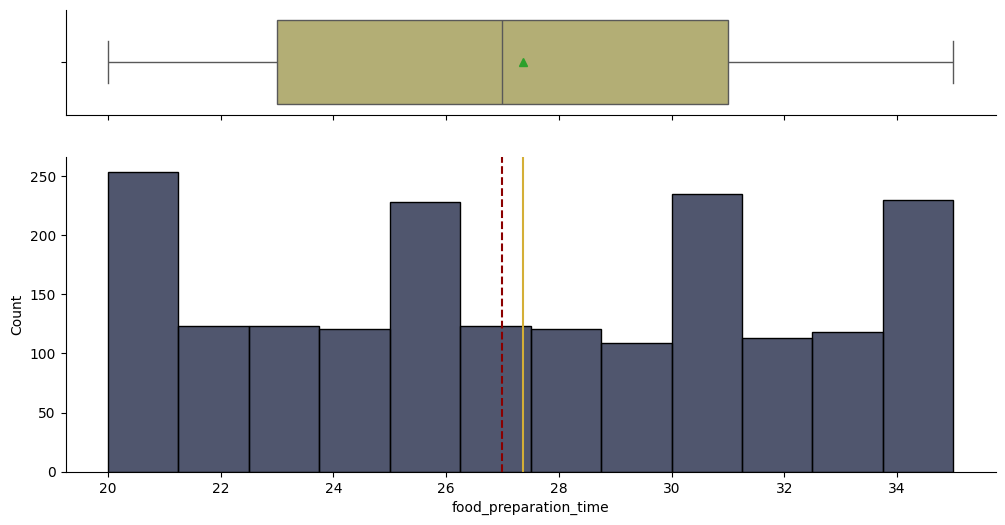

In [ ]:
# show order times to prepare food
boxplot_histogram(df.food_preparation_time)

####Observations
* The distribution of food prep time is multimodal, not quite symmetrical given that the mean and mode are not perfectly aligned
* The average time it takes to prepare an order is just over 27 minutes and the median time is slightly less than 27 minutes


####Delivery Times

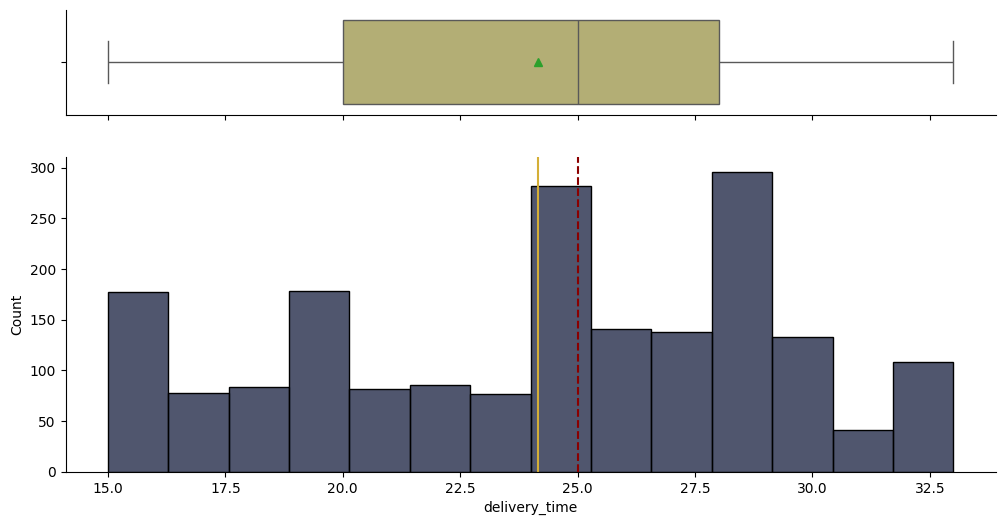

In [ ]:
# show delivery times
boxplot_histogram(df.delivery_time)

####Observations
* The distribution of delivery times is slightly left-skewed, which tels us the slight majority of deliveries use less time overall
* The mean delivery time is approximately 24 minutes, slightly less than the average time it takes to prepare food; the median delivery time is 25 minutes



####Cost of Orders

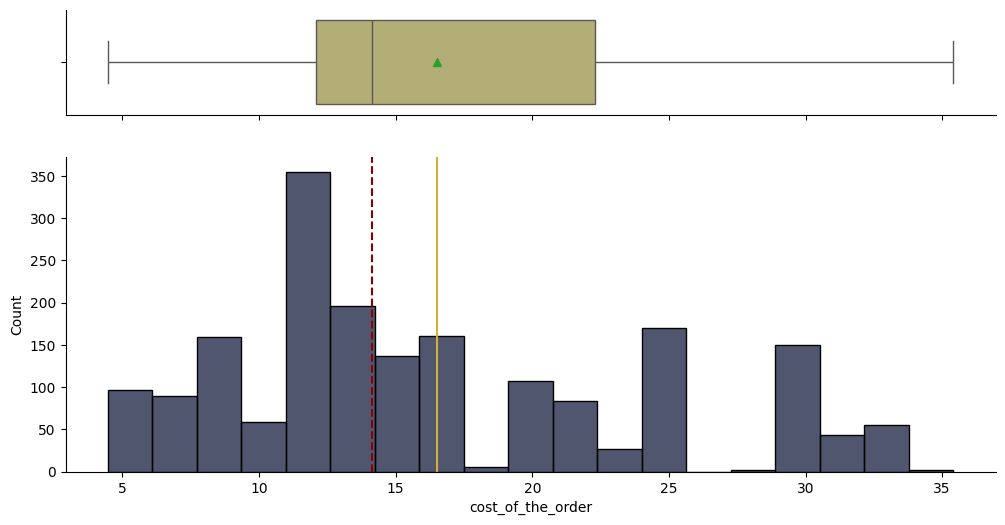

In [ ]:
# explore the range of cost for the orders placed
boxplot_histogram(df.cost_of_the_order)

####Observations
* The distribution of the cost of each order is right-skewed
* Order volumes are significantly higher for orders between $12 - 14

* The median cost is just over $14

* The average cost per order is $16.50

####Ratings

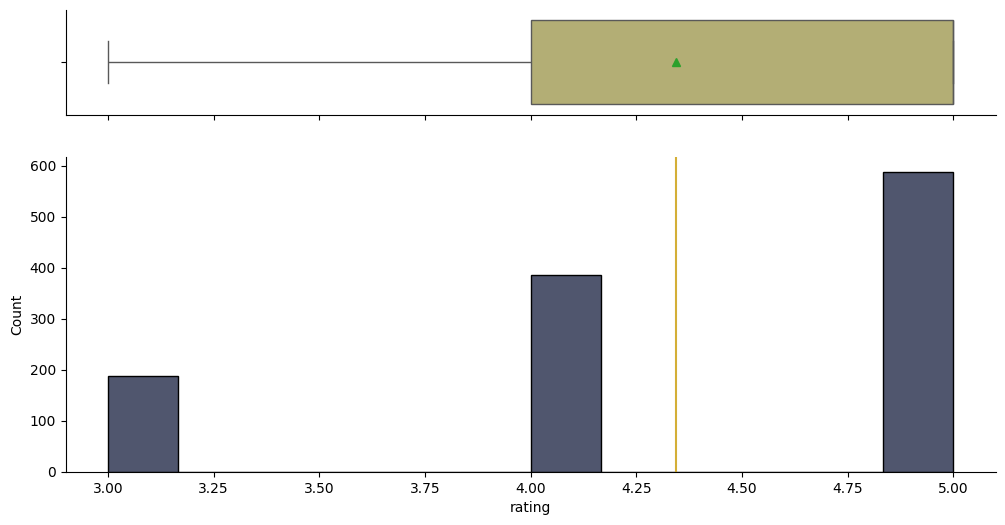

In [ ]:
# explore the ratings
boxplot_histogram(df.rating)

####Observations
* The distribution of ratings is highly positively skewed and show that there are no ratings below 3, which may account for the missing values
* The minimum rating received is 3 and the maximum rating is 5
* The average rating is over 4.25, less than 4.5


**Exploring Categorical Data**

In [ ]:
# function to display categorical variables: day of the week, cuisine type
def vis_categ(data, column):
    # column length for use to depict percentage calculation
    total = len(data[column])
    plt.figure(figsize = (12, 6))

    # convert the column to a categorical data type
    data[column] = data[column].astype('category')

    # create countpolot
    ax = sns.countplot(data = df, x = column, hue = column, order = data[column].value_counts().index, palette = 'cividis_r')

    # show percentages in visualization
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # width of the plot
        y = p.get_y() + p.get_height()                              # height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # annotate the percentage

    # customize x-axis ticks to 45 degrees
    ax.set_xticks(range(len(data[column].value_counts().index)))
    ax.set_xticklabels(data[column].value_counts().index, rotation=45)

    # remove top and outer border of plot
    sns.despine();
    plt.show()


####Cuisine Types

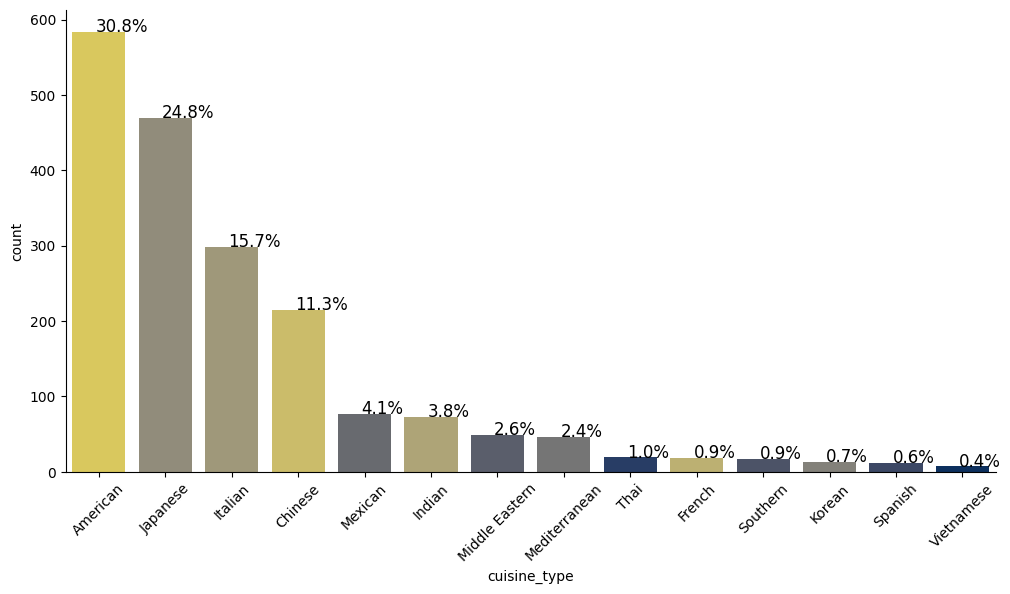

In [ ]:
# most popular cuisines, percentage range of available cuisine
vis_categ(df, 'cuisine_type')

**Observations**
* There are 14 different types of cuisine represented in the data
* The most popular cuisine types are: American, Japanese, Italian and Chinese (in that order)
* The top four cuisine types comprise 82.6% of all orders placed

####Delivery: Weekday or Weekend

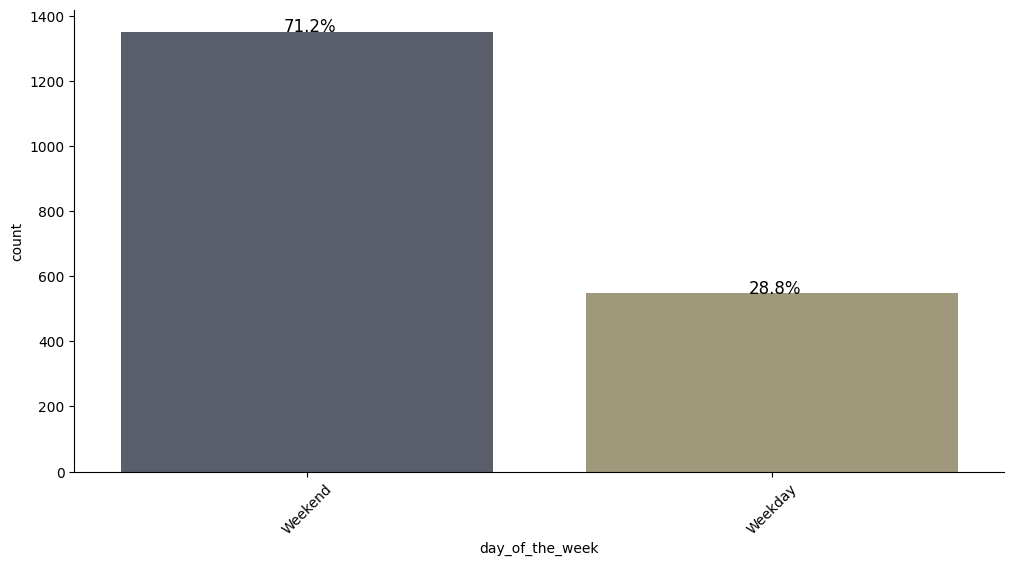

In [ ]:
# relationship between orders placed on weekday or weekend

vis_categ(df, 'day_of_the_week')



In [ ]:
# how many restaurants participate
rest_count = df['restaurant_name'].nunique()
print(rest_count, "restaurants are represented in this dataset.")

178 restaurants are represented in this dataset.


####Observations



* We can see that weekend deliveries are significantly higher than weekday deliveries

### What are the top 5 restaurants in terms of the number of orders received?

In [ ]:
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

#### Observations
* The top five restaurants correlate well with the most popular (top three) cuisines in the dataset

### What is the most popular cuisine on weekends?

In [ ]:
weekend = df[df['day_of_the_week'] == 'Weekend']
print(f"The most popular cuisine on weekends is:\n {weekend['cuisine_type'].value_counts()}")

The most popular cuisine on weekends is:
 cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64


#### Observations
* The most popular cuisine orders on weekends correlate with the most popular cuisines throughout the dataset


### What percentage of the orders cost more than 20 dollars?

In [ ]:
orders_over_20 = df[df['cost_of_the_order'] > 20]
percent_over_20 = len(orders_over_20) / len(df) * 100
print(f"{percent_over_20:.2f}% of orders cost more than 20 dollars.")
print(f'The number of total orders that cost above 20 dollars is {orders_over_20.shape[0]} out of 1898 orders in the dataset.')


29.24% of orders cost more than 20 dollars.
The number of total orders that cost above 20 dollars is 555 out of 1898 orders in the dataset.


#### Observations
* This calculation corresponds well to the cost-per-order histogram

### What is the mean order delivery time?

In [ ]:
print(f'The mean order delivery time is {df["delivery_time"].mean():.2f} minutes.')

The mean order delivery time is 24.16 minutes.


#### Observations
* This calculation corresponds well to the order delivery time histogram

### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Identifying the IDs of these customers and the number of orders they placed.

In [ ]:
print(f"The top three most frequent customers and the number of orders they placed is:\n{df['customer_id'].value_counts().head(3)}.")


The top three most frequent customers and the number of orders they placed is:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64.


###**Multivariate Analysis**
Exploring relationships between important variables in the dataset

####Heatmap to determine correlation among variables

Text(0.5, 1.0, 'Correlation among Variables')

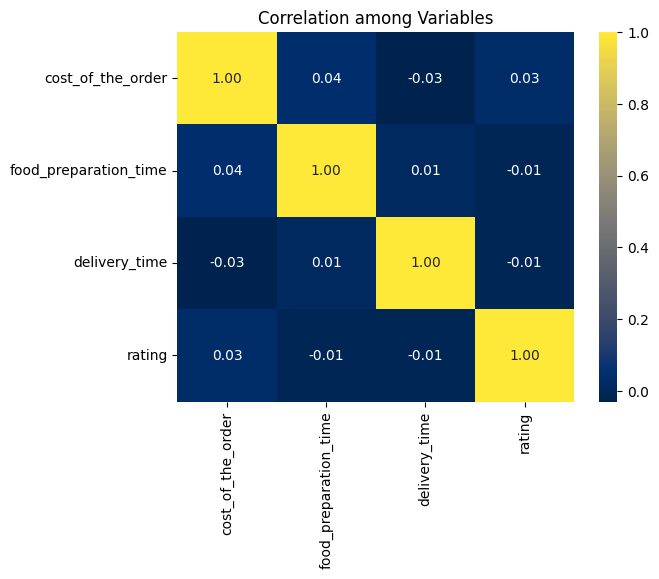

In [ ]:
# plot the heatmap amongst variables
var_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
sns.heatmap(df[var_list].corr(), annot = True, fmt = '.2f', cbar=True, cmap = 'cividis')
plt.title("Correlation among Variables")

####Observations

* Although we can see that the cost of the order is most closely aligned with the food preparation time, the correlations among the variables seem loosely related given that the closer to 1 or -1, the higher the correlation
* We could not include any of the categorical values like cuisine type in the heatmap given that they do not have numeric values
* However, there are valid comparisons to be made that may be of interest to the business to explore potential efficiency trends. Operationally, they include:

    * delivery times: weekday v. weekend
    * cuisine types and food prep time
    * cuisine types and cost of the order
    * cuisine types and revenue distribution
    * restaurants and revenue distribution
    * customers and revenue distribution

*   Although approximately 38% of the rating values are missing, we will still use this dataset to explore trends to discover customer feedback tendencies. As such, we will consider:

    *   the relationship between cuisine type and presence of ratings
    *   the relationship between rating values and the cost of the order
    *   the relationship between rating values and delivery time v. rating values and total order time (food prep and delivery)

####Delivery Times: Weekday v. Weekend

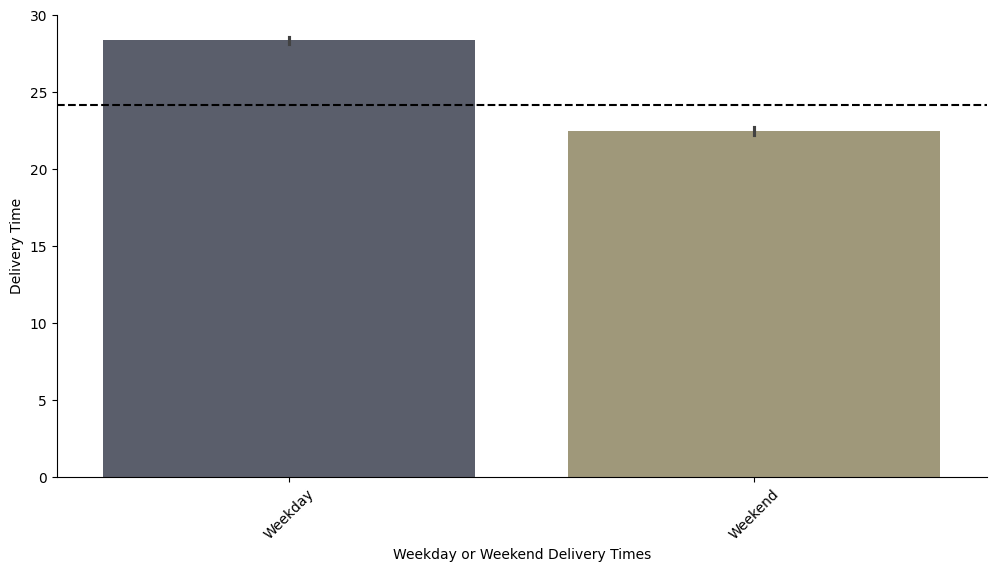

In [ ]:
# relationship between delivery time on weekends v. weekdays
mean = df["delivery_time"].mean()
plt.figure(figsize=(12,6))
sns.barplot(x = "day_of_the_week", y = "delivery_time", hue = "day_of_the_week", data = df, palette = "cividis")
plt.axhline(y=mean, color='k', linestyle='--', label=f'Mean Delivery Time: {mean:.2f}')
plt.xlabel("Weekday or Weekend Delivery Times")
plt.ylabel("Delivery Time")
plt.xticks(rotation = 45)
sns.despine()
plt.show()

####Observations
* The weekend delivery times fall below the average time for order delivery and are quicker than the weekday delivery times, potentially due to traffic congestion?

####Relationship between cuisine and food preparation time

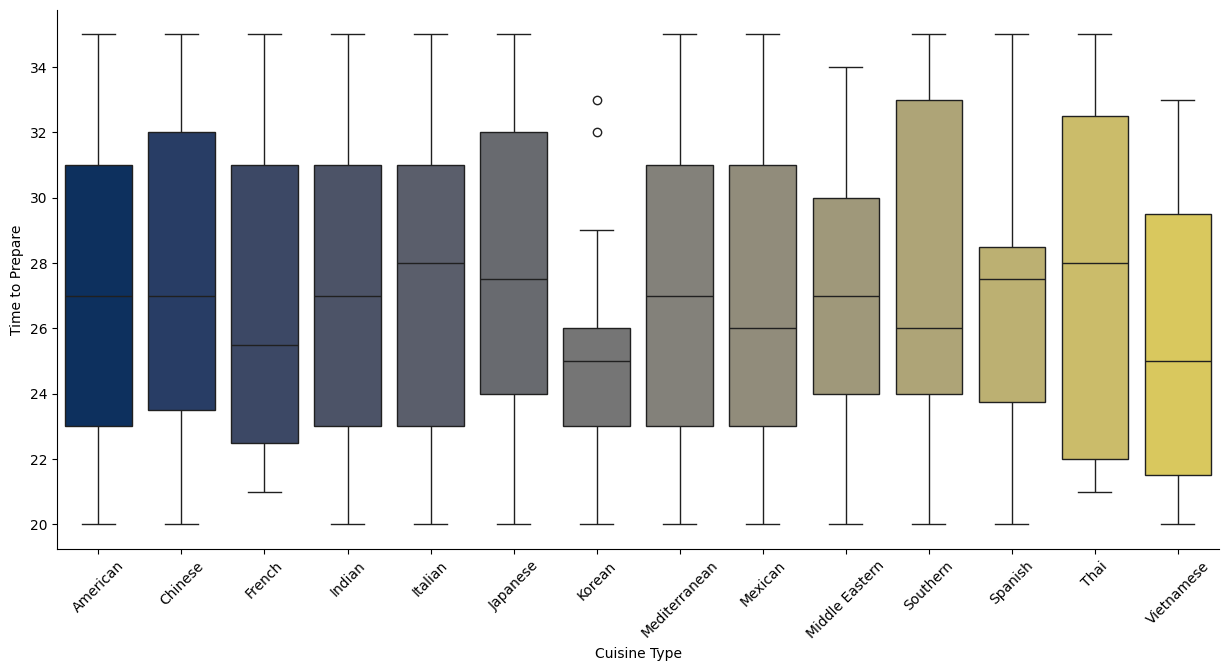

In [ ]:
# relationship between cuisine and food prep time
plt.figure(figsize=(15,7))
sns.boxplot(x="cuisine_type", y="food_preparation_time", hue="cuisine_type", data=df, palette ="cividis", legend=False)
plt.xlabel("Cuisine Type")
plt.ylabel("Time to Prepare")
plt.xticks(rotation = 45)
sns.despine()
plt.show()

####Observations
* Although the range of time to prepare food falls between 22 and 33 minutes, the average time for all cuisines to be prepared is between 25 and 28 minutes.
* We can see that Southern and French cuisine are right-skewed, which tells us that although the average time to prep these orders is not particularly high compared to other cuisines, many of the orders of these two types required more time, especially the Southern cuisine orders.
* We do see two Korean outlier values. After inspection of the dataset excel file, these orders were prepared by the same restaurant who typically have higher food preparation times when compared to the other restaurants. Because they are two of 1898 orders and the mean food preparation time for Korean food is lower than the other cuisines, the outliers will not be imputed as they are most likely not statistically significant.

####Relationship between cuisine type and cost of each order

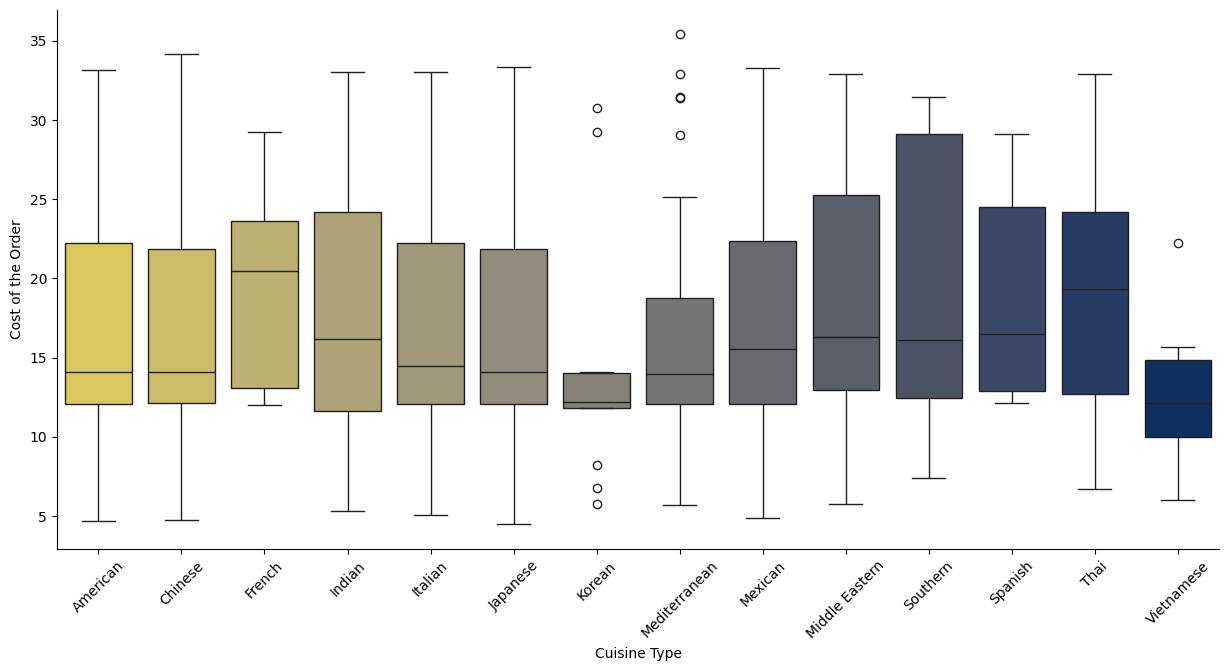

In [ ]:
# relationship between cuisine and cost of each order
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", hue = "cuisine_type", data = df, palette ="cividis_r")
plt.xlabel("Cuisine Type")
plt.ylabel("Cost of the Order")
plt.xticks(rotation = 45)
sns.despine()
plt.show()


####Observations
* There are a few cost outliers found in the Korean orders, the Mediterranean orders, and the Vietnamese orders


In [ ]:
#compare outlier values to statistical summary of all order costs
df.describe()[['cost_of_the_order']]

,cost_of_the_order
count,1898.000000
mean,16.498851
std,7.483812
min,4.470000
25%,12.080000
50%,14.140000
75%,22.297500
max,35.410000


I####Observations

* We can see that the average order is 16.50, with a standard deviation of 7.48 and that the outliers fall significantly below or above one standard deviation and the mean.
* We know the mean is sensitive to outliers; however, the relatively few outliers (10/1898) should not affect the mean significantly.
* However, further analysis should be explored to, in the very least, check for errors.
* After visual inspection of the dataset, the more expensive orders were typically ordered on weekends which tell us the orders were probably larger orders and the values were not entered in error. Given the lower mean value or average cost of orders of these three cuisines, the lower cost outliers are not considered statistically significant.
* In addition, given the few number of values that are outliers, 7/1898 as high outliers and 3/1898 as low outliers, I will not impute these outliers as they should not have a significant statistical impact in our analysis.

**Revenue Analyses**

####Relationship between cuisine type and order revenue

In [ ]:
# relationship between cuisine type and order revenue
revenue_by_cuisine = df.groupby(['cuisine_type'])['cost_of_the_order'].sum().sort_values(ascending = False).head(20)

# format as a table for presentation purposes
# convert the result to a DataFrame and reset index
cuisine_table = pd.DataFrame(revenue_by_cuisine).reset_index()

# rename columns for clarity
cuisine_table.columns = ['Cuisine Type', 'Total Revenue']

# display the table with font properties, gridlines, and formatting
display(cuisine_table.style.set_properties(**{'font-family': 'Arial'}).set_table_styles([
    dict(selector="th", props=[('font-size', '12pt'), ('font-family', 'Arial')]),
    dict(selector="td", props=[('font-size', '12pt'), ('font-family', 'Arial')]),
    dict(selector="table", props=[('border', '1px solid black')]),
]).format({'Total Revenue': '{:.2f}'}))

,Cuisine Type,Total Revenue
0,American,9530.78
1,Japanese,7663.13
2,Italian,4892.77
3,Chinese,3505.62
4,Mexican,1303.85
5,Indian,1235.14
6,Middle Eastern,922.21
7,Mediterranean,711.84
8,Thai,364.95
9,French,356.29


####Relationship between restaurants and revenue

In [ ]:
# relationship between restaurants and revenue
revenue_by_restaurant = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10)

# format as a table, nicer presentation
# convert the result to a DataFrame and reset index
restaurant_table = pd.DataFrame(revenue_by_restaurant).reset_index()

# rename columns for clarity
restaurant_table.columns = ['Restaurant Name', 'Total Revenue']

# display the table with font properties, gridlines, and formatting
display(restaurant_table.style.set_properties(**{'font-family': 'Arial'}).set_table_styles([
    dict(selector="th", props=[('font-size', '12pt'), ('font-family', 'Arial')]),
    dict(selector="td", props=[('font-size', '12pt'), ('font-family', 'Arial')]),
    dict(selector="table", props=[('border', '1px solid black')]),
]).format({'Total Revenue': '{:.2f}'}))

,Restaurant Name,Total Revenue
0,Shake Shack,3579.53
1,The Meatball Shop,2145.21
2,Blue Ribbon Sushi,1903.95
3,Blue Ribbon Fried Chicken,1662.29
4,Parm,1112.76
5,RedFarm Broadway,965.13
6,RedFarm Hudson,921.21
7,TAO,834.50
8,Han Dynasty,755.29
9,Blue Ribbon Sushi Bar & Grill,666.62


####Observations

* We know that American cuisine is the most popular, which may account for its ranking as first in terms of highest revenue.
* We can see that four types of cuisine proffer the highest revenue: American, Japanese, Italian, and Chinese, which mirror our calculations to determine the most popular cuisines

####Relationship between customers and revenue

In [ ]:
# relationship between customer and revenue
df.groupby(['customer_id'])['cost_of_the_order'].sum().sort_values(ascending = False).head(20)

customer_id
52832     225.80
250494    183.83
47440     158.18
276192    146.46
83287     139.31
259341    130.81
97991     122.03
82041     120.92
115213    115.40
60039     109.76
97079     107.28
64153     103.17
127149    103.16
60052     102.24
65009      99.49
229946     99.39
275689     98.05
107909     97.68
125123     95.56
91817      95.30
Name: cost_of_the_order, dtype: float64

In [ ]:
total_sum = df['cost_of_the_order'].sum()

print("Total revenue generated:", total_sum)

Total revenue generated: 31314.82


####Observations
* We can identify the top customers who placed repeated orders
* The top twenty of the 1200 customers represent 7.8% of the total revenue generated in this dataset

**Ratings Analyses**

####Relationship between cuisine type and whether deliveries are rated

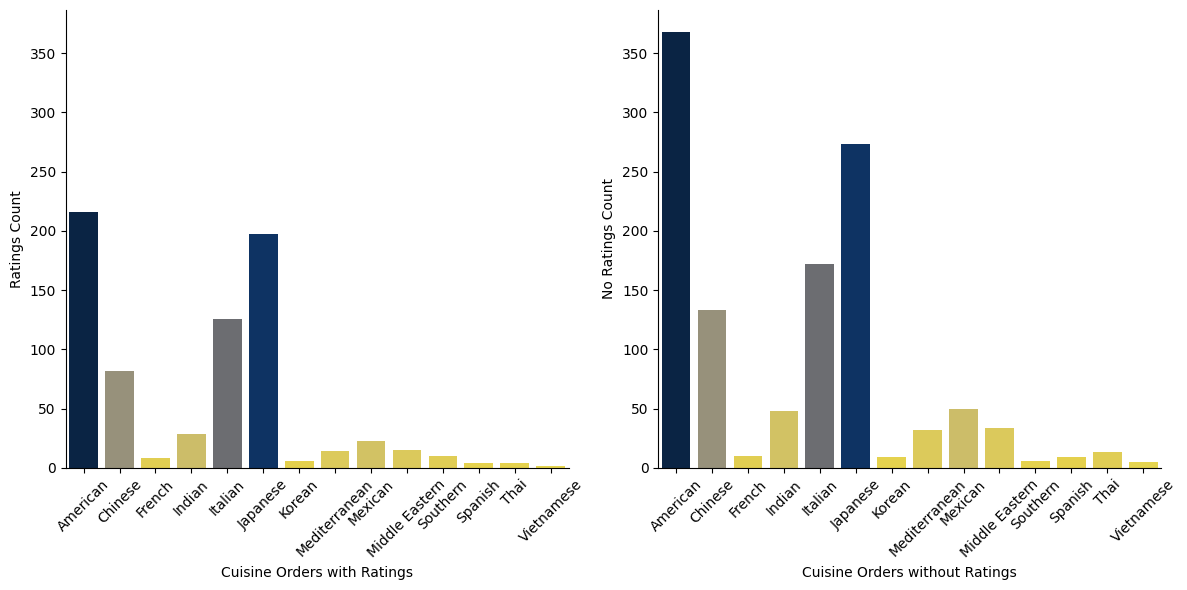

In [ ]:
# relationship between cuisine type and presence of ratings
# create subsets to separate orders with ratings from orders missing ratings
rating = df[df['rating'].notnull()]
no_rating = df[df['rating'].isnull()]

rating_cuisine = rating['cuisine_type'].value_counts()
no_rating_cuisine = no_rating['cuisine_type'].value_counts()

# plot side by side comparison charts
plt.figure(figsize = (12, 6))

# first plot
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x = rating_cuisine.index, y = no_rating_cuisine.values, hue = no_rating_cuisine, palette = "cividis_r", legend = False)
plt.xlabel("Cuisine Orders with Ratings")
plt.ylabel("Ratings Count")
plt.xticks(rotation = 45)
sns.despine()

# second plot
ax2 = plt.subplot(1,2,2, sharey=ax1)
sns.barplot(x = no_rating_cuisine.index, y = rating_cuisine.values, hue = no_rating_cuisine, palette = "cividis_r", legend = False)
plt.xlabel("Cuisine Orders without Ratings")
plt.ylabel("No Ratings Count")
plt.xticks(rotation = 45)
sns.despine()
plt.suptitle
plt.tight_layout()
plt.show()

####Relationship between rating values and cost of order

In [ ]:
# explore relationship between ratings and cost of order

# find the range of order costs
min_cost = (df['cost_of_the_order'].min())
max_cost = (df['cost_of_the_order'].max())
print('The minimum cost of all orders is', min_cost)
print('the maximum cost of all orders is', max_cost)

The minimum cost of all orders is 4.47
the maximum cost of all orders is 35.41


####Observations
* Because there is a significant cost range among all orders, the orders will be binned, or grouped, for analysis

<Figure size 1200x600 with 0 Axes>

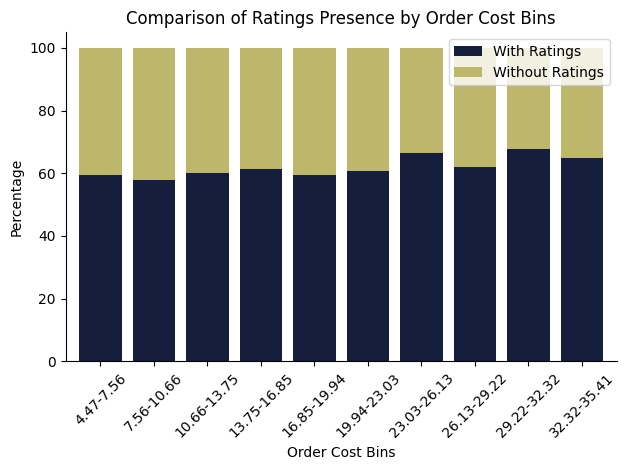

In [ ]:
# explore the relationship between cost and presence of ratings

# separate numerical values from NaN
rating = df[df['rating'].isna()]
no_rating = df[~df['rating'].isna()]

# define the number of bins and bin edges
num_bins = 10
bin_edges = np.linspace(4.47, 35.41, num_bins + 1)

# bin the order costs because they are numerous
df['cost_bin'] = pd.cut(df['cost_of_the_order'], bins=bin_edges)

# count ratings in each bin
ratings_counts = df.groupby(['cost_bin', df['rating'].isna()])['cost_of_the_order'].count().unstack(fill_value=0)

# calculate total counts for each bin
total_counts = ratings_counts.sum(axis=1)

# calculate percentage of each bin
percentages = ratings_counts.div(total_counts, axis=0) * 100

plt.figure(figsize=(12, 6))
percentages.plot(kind='bar', stacked=True, color=["#151e3d", "darkkhaki"], width=0.8)
plt.title('Comparison of Ratings Presence by Order Cost Bins')
plt.xlabel('Order Cost Bins')
plt.ylabel('Percentage')
plt.xticks(np.arange(num_bins), [f'{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}' for i in range(num_bins)], rotation=45)
plt.legend(['With Ratings', 'Without Ratings'])
sns.despine()

plt.tight_layout()
plt.show()

####Observations
* The relationship between the cost of the order and whether the order/delivery was rated is approximately equal, no matter the cost, around 60%.

####Relationship between time to deliver and rating values v. total order time (food preparation & delivery) and rating values

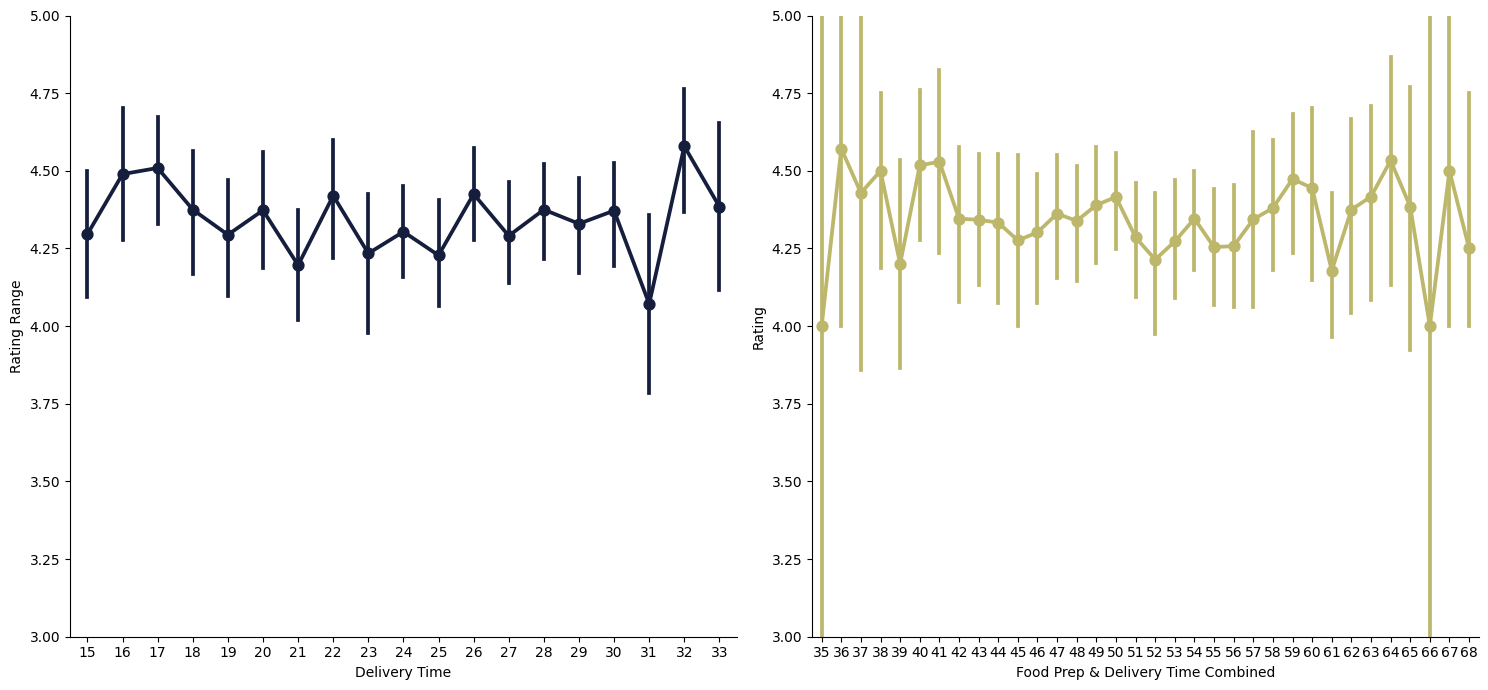

In [ ]:
# show relationship between delivery time and rating values and total order time (food prep and delivery) and rating values

# calculate minimum and maximum ratings to plot y axis
min_rat = df['rating'].min()
max_rat = df['rating'].max()

# calculate total time for order preparation and delivery time
df["prep_delivery"] = df["food_preparation_time"] + df['delivery_time']

plt.figure(figsize=(15, 7))

# first subplot: delivery time
ax1 = plt.subplot(1, 2, 1)
sns.pointplot(data=df, x='delivery_time', y='rating', color="#151e3d")
plt.xlabel('Delivery Time')
plt.ylabel('Rating Range')
plt.ylim(min_rat, max_rat)
sns.despine()

# second subplot: aggregated delivery and food prep time
ax2 = plt.subplot(1, 2, 2)
sns.pointplot(data=df, x='prep_delivery', y='rating', color="darkkhaki")
plt.xlabel('Food Prep & Delivery Time Combined')
plt.ylabel('Rating')
plt.ylim(min_rat, max_rat)
sns.despine()


plt.tight_layout()
plt.show()


####Observations
* The customers who provided ratings seem generally satisfied with their order as the minimum rating recorded was 3, and the maximum rating was 5.
* Not shown here is an exploration of the relationship between food prep time and ratings because they practically mirrored the delivery time rating pattern and range.
* Interestingly, the amount of time for an order to be prepared and delivered did not seem to skew the ratings. That is, the rating range seemed consistent, whether the food was delivered more quickly or not.

The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# rating column has either NaN or numeric values and is ready for calculation
# find the restaurants with aggregate rating count greater than 50
rating_counts = df.groupby('restaurant_name')['rating'].count()
rest_over_50 = rating_counts[rating_counts > 50].index
print(rest_over_50)

Index(['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack',
       'The Meatball Shop'],
      dtype='object', name='restaurant_name')


In [ ]:
# create dataframe with restaurants with ratings more than 50
df_over_50 = df[df['restaurant_name'].isin(rest_over_50)]

# calculate average rating in new dataframe
ave_rating_over_50 = df_over_50.groupby('restaurant_name')['rating'].mean()
print(ave_rating_over_50)

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64


#### Observations
* The four restaurants who qualify for the promotional offer are:
    * Blue Ribbon Fried Chicken
    * Blue Ribbon Sushi
    * Shake Shack
    * The Meatball Shop

* The restaurants who qualify for the offer correspond to  three of the top four cuisine types: American, Japanese, and Italian


Finding the net revenue generated by the company across all orders (the company charges the restaurant 25% on the orders that cost more than 20 dollars and 15% on the orders that cost more than 5 dollars)

In [ ]:
def revenue(x):
  if x > 20:
    return x * 0.25
  elif x > 5:
    return x * 0.15
  else:
    return x * 0

df['total_revenue'] = df['cost_of_the_order'].apply(revenue)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cost_bin,prep_delivery,total_revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,"(29.222, 32.316]",45,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,"(10.658, 13.752]",48,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,"(10.658, 13.752]",51,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,"(26.128, 29.222]",40,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,"(10.658, 13.752]",49,1.7385


In [ ]:
total_revenue = df['total_revenue'].sum()
print("Total revenue generated by the company: ${:.2f}".format(total_revenue))

Total revenue generated by the company: $6166.30


#### Observations
* It would be interesting to know the time span of the dataset to calculate and see the monthly, quarterly, and yearly revenue trends


### Total time required to deliver the food: finding the percentage of orders that take more than 60 minutes to get delivered from the time the order is placed?

In [ ]:
df['total_time'] = df["food_preparation_time"] + df['delivery_time']
more_than_60 = df[df['total_time'] > 60].shape[0]
total_orders = df.shape[0]
print(f'The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is {(more_than_60/total_orders) * 100:.2f}%.')

The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is 10.54%.


#### Observations:
* Because the ratings are high regardless of time of delivery, from a customer's perspective, the total time from order placement to delivery does not seem to affect customer response.
* It would be interesting to see whether the total time for order/delivery affects the repeat customer values.


###Exploring the mean delivery time, weekdays v. weekends?

In [ ]:
mean_weekday = round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean())
mean_weekend = round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean())

print(f'The mean delivery time on weekdays is approximately {mean_weekday} minutes, and the average delivery time on weekends is approximately {mean_weekend} minutes.')
print(f'The weekend delivery time is approximately {mean_weekday - mean_weekend} minutes faster.')


The mean delivery time on weekdays is approximately 28 minutes, and the average delivery time on weekends is approximately 22 minutes.
The weekend delivery time is approximately 6 minutes faster.


#### Observations:
* Although six minutes does not seem significant, weekday delivery is 21% slower. It would be interesting to know why weekend delivery is faster, whether traffic is a factor or number of available drivers, etc.


### **Conclusion and Recommendations**

#### Conclusions:
I analyzed a dataset of nearly 2000 food delivery orders information to get a fair idea about the demand of different restaurants. The main feature of interest here is the types of cuisine that are most popular as well as when the orders are most prevalent, in this case weekday or weekend. We can see that American, Italian, Japanese and Chinese are the most popular cuisines, and the busiest time for order delivery is on weekends.

We found that:
* American, Italian, Japanese and Chinese food are the most popular cuisines

* Orders that cost $12-14 showed the most volume

* Orders over $20 (and the respective higher percentage fee charged to restaurants) claimed 29% of the total orders
* Ratings did not seem affected by the time for delivery; it is curious that there were no ratings below 3
* Weekend delivery times were significantly faster than weekday delivery times

#### Further Analysis
* Because time is one of the most expensive components of single-point delivery, it would be helpful to understand why average delivery time on weekends is 21% faster than on weekdays.
* As such, it may be worthwhile to determine the times of day that are most popular (also to ensure the delivery driver availability is well utilized). It may also be worthwhile to map the locations of the restaurants and driver availability accordingly.
* Although ratings are high regardless of time of delivery, from a customer's perspective, the total time from order placement to delivery does not seem to affect customer response. However, it would be interesting to see whether the total time for order/delivery affects the repeat customer values.
* It would be helpful to know the timespan of the dataset to fully understand the monthly and quarterly trends and how factors including weather, time of day might affect delivery volume.

#### Recommendations:

Because American, Japanese and Italian restaurants are often clustered geographically, it may be worthwhile to market delivery services around the most popular restaurants that we've identified.

In addition to charging a percentage fee to the restaurant, food delivery industry standards also offer another revenue stream: charging the customer a nominal fee for delivery. It might be worthwhile to explore introducing a nominal delivery fee to be charged to the customer for each order.

Given the company charges each restaurant charges 5% more per delivery for orders over 20 dollars and the average cost of a meal is $16.50, perhaps a customer promotion could be implemented to boost the orders over 20 dollars.

It might be beneficial to investigate the geographical parameters or other variables that explain the 10% orders that took more than an hour for food preparation and delivery.

---